# Chapter 2 Quantum mechanics toward tight binding model

## 1. One potential problem
The 1D Shredhinger equation is written as 
$$
\left( -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \right) \psi(x) = \epsilon \psi(x)
$$
By non dimensionalization,
$$
\left( -\frac{d^2}{dx^2} + V(x) \right) \psi(x) = \epsilon \psi(x)
$$
Here we assume a potential as follows:
$$
V(x) = V_0 \exp(-x^2)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

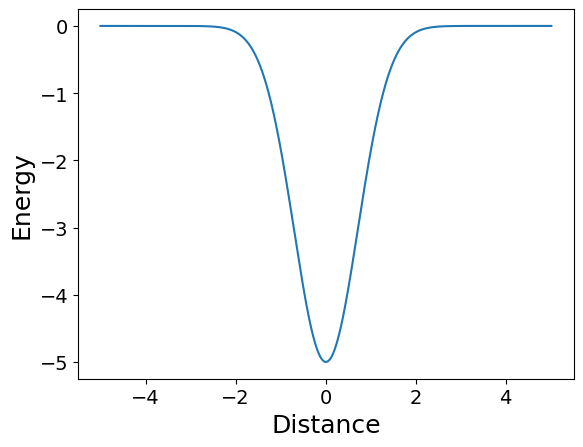

In [3]:
V0 = -5.0

def potential(x, offset = 0):
    V =  V0*np.exp(-(x - offset)**2)
    return V

N = 1000
xmax = 5.0
xmin = -5.0
xvec = np.linspace(xmin, xmax, N)
pot = potential(xvec)
plt.plot(xvec, pot)
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Energy", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

We will solve the eqution by sdiscreting the space. The derivative expression can be rewretten as 
\begin{align}
\frac{d}{dx}\psi(x) &= \left(\frac{\psi(x+dx)-\psi(x)}{dx}+\frac{\psi(x)-\psi(x-dx)}{dx}\right)/2\\
&=\frac{\psi(x+dx) + \psi(x-dx)}{2dx}\\
\frac{d^2}{dx^2}\psi(x) &= \frac{d}{dx}\left(\frac{d}{dx}\psi(x)\right)\\
&= \frac{\psi(x+dx)-2\psi(x)+\psi(x-dx)}{dx^2}
\end{align}
We will think about the shredhinger equation at each point. The eqations can be summarized in the matrix form. The matrix can be constructed as follows:


In [4]:
def make_H1d(N, xmax, xmin, V):
    mat_H = np.zeros((N, N))
    dx = (xmax-xmin)/N
    # calculating the matrix element for each x
    for n in range(N):
        for i in (-1, 0, 1):
            j = n + i
            v = 0.0 
            if i == 0:              
                v = 2/dx**2 + V[n]
            elif i == 1:
                v = -1/dx**2
            elif i == -1:
                v = -1/dx**2
            
            if 0 <= j and j < N:
                mat_H[n,j] = v
                
    return mat_H

By diagonalization, the eigen values for the matrix can be obtaned. 

In [5]:
# Getting the matrix
mat_H = make_H1d(N,xmax,xmin, pot)
# diagonalization of the matrix
energy,mat_v = np.linalg.eig(mat_H)
# sort the eigen values and eigen vectors from the low values.
ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]
print(energy[0:9])

[-3.13885848 -0.3967875   0.43940638  0.88104411  1.78572116  2.78490419
  4.04643498  5.50164821  7.15861066]


The wave function for the lowest energy can be shown as follows:

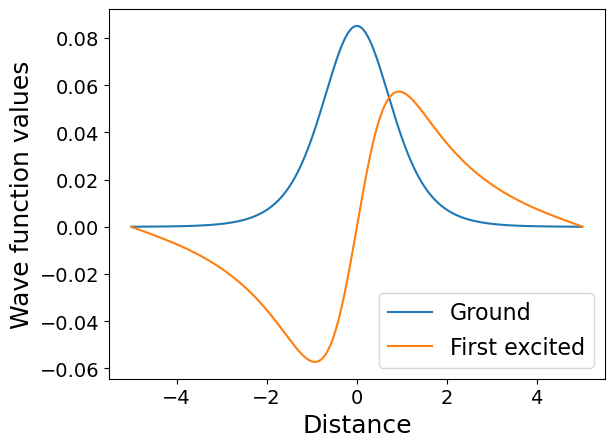

In [6]:
plt.plot(xvec, -mat_v[0,:], label = "Ground")
plt.plot(xvec, mat_v[1,:], label = "First excited")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 16)
plt.show()

## 2. Multiple potential
Let us align four potentials.

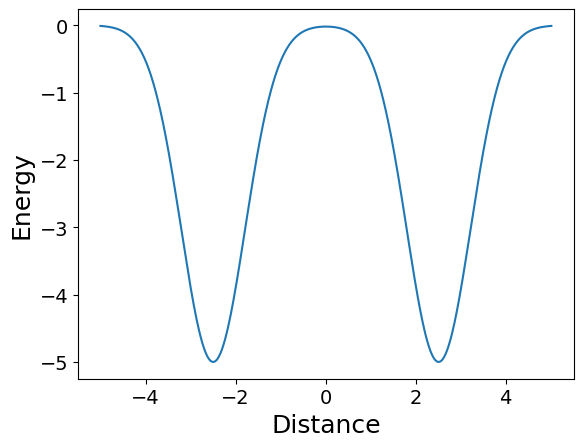

In [7]:
def potential_per(x,V0,xmax,xmin,nump):
    dx = (xmax-xmin)/(nump)
    V3 = 0.0
    for i in range(nump):
        x0 = i*dx + xmin+dx/2
        V3 += V0 * np.exp(-(x-x0)**2)
    return V3

N = 1000
xmax = 5
xmin = -5.0
x = np.linspace(xmin, xmax, N)

V3 = potential_per(x,V0,xmax,xmin,2)
plt.plot(x,V3,label="Potential")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Energy", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

We also prepare a new Hamiltonian which takes periodic condition into account.

In [8]:
def make_H1dp(N,xmax,xmin,V):
    mat_H = np.zeros((N, N))
    dx = (xmax-xmin)/N   
    for n in range(N):
        for i in (-1, 0, 1):
            j = n + i
            # periodic boundary consition. 
            if j >=N:
                j = 0
            if j <0:
                j = N -1
            v = 0.0 
            if i == 0:              
                v = (2/dx**2 + V[n])
            elif i == 1:
                v = -1/dx**2
            elif i == -1:
                v = -1/dx**2
            if 0 <= j and j < N:
                mat_H[n,j] = v
                
    return mat_H


-3.1449692752525062
-3.132753094226478


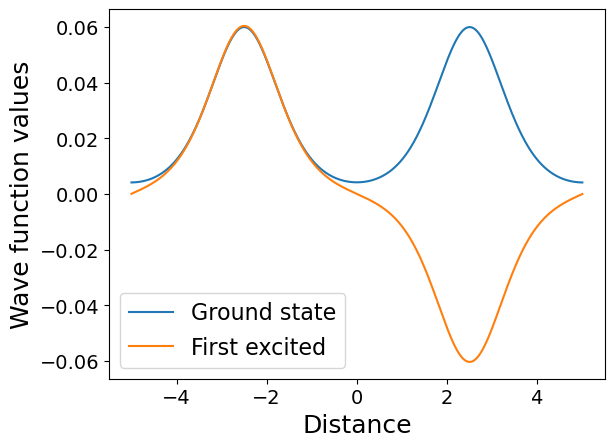

In [12]:
N = 1000
xmax = 5
xmin = -5
xvec = np.linspace(xmin, xmax, N)
V3 = potential_per(x,V0,xmax,xmin,2)
mat_H3 = make_H1dp(N,xmax,xmin,V3) 

energy3,mat_v3 = np.linalg.eig(mat_H3)
ind3 = np.argsort(energy3)
energy3 = energy3[ind3]
mat_v3 = mat_v3.T[ind3]

print(energy3[0])
print(energy3[1])
plt.plot(xvec,-mat_v3[0], label = "Ground state")
plt.plot(xvec,mat_v3[1], label = "First excited")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 16)
plt.show()

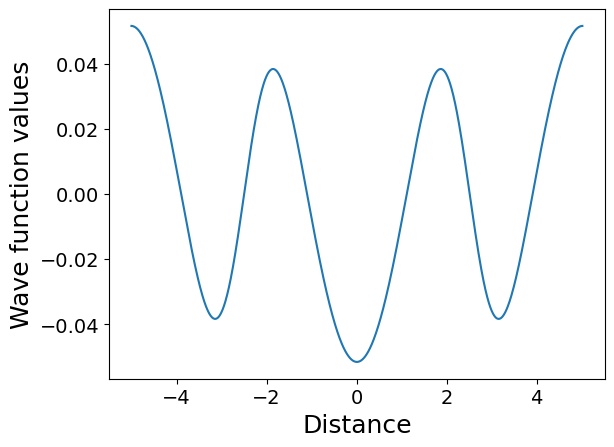

In [21]:
# Memo
plt.plot(xvec,-mat_v3[5])
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

## 3 Shredhinger equation from confined state
We will think about the linear combination of the wave function for the single potential state:
$$
\psi(x) = c_1 \psi_1(x) + c_2 \psi_2(x)
$$
where
$$
\left( -\frac{d^2}{dx^2} + V_1(x) \right) \psi_1(x) = \epsilon_0 \psi_1(x)
$$
$$
\left( -\frac{d^2}{dx^2} + V_2(x) \right) \psi_2(x) = \epsilon_0 \psi_2(x)
$$
$$
V_1(x) = V_0 \exp(-(x-x_0)^2)
$$
$$
V_2(x) = V_0 \exp(-(x+x_0)^2)
$$
$\psi_1(x)$ and $\psi_2(x)$ are the wave function for the single potential $V_1(x)$ and $V_2(x)$. The Shredinger equation for the two potential state is 
$$
\left( -\frac{d^2}{dx^2} + V_1(x) + V_2(x) \right) \psi(x) = \epsilon \psi(x)
$$
Substituting the linearly combined aolution of the equation, which yields 
$$
\left( -\frac{d^2}{dx^2} + V_1(x) + V_2(x) \right) (c_1 \psi_1(x) + c_2 \psi_2(x)) = \epsilon (c_1 \psi_1(x) + c_2 \psi_2(x))
$$
$$
\epsilon_0 c_1 \psi_1(x)  + V_2(x) c_1 \psi_1(x) + \epsilon_0 c_2 \psi_2(x)  + V_1(x) c_2 \psi_2(x) = \epsilon (c_1 \psi_1(x) + c_2 \psi_2(x)).
$$
Integration after multiplying $\psi_1(x)^{\ast}$ yields
$$
\epsilon_0 c_1   +c_1 \int |\psi_1(x)|^2 V_2(x) dx    + c_2 \int \psi_1(x)^{\ast} \psi_2(x) V_1(x) dx +\epsilon_0 c_2 \int \psi_1(x)^{\ast} \psi_2(x)dx = \epsilon c_1 
$$
Integration after multiplying $\psi_2(x)^{\ast}$ yields
$$
\epsilon_0 c_1 \int \psi_2(x)^{\ast} \psi_1(x) dx+ c_1 \int \psi_2(x)^{\ast} \psi_1(x)V_2(x) dx + \epsilon_0 c_2   + c_2 \int V_1(x)|\psi_2(x)|^2 dx= \epsilon  c_2 
$$
The matrix form of these two equations is
$$
\left( 
\begin{matrix}
\epsilon_0 +\int |\psi_1(x)|^2 V_2(x)dx  & \int \psi_1(x)^{\ast} \psi_2(x) (V_1(x)+\epsilon_0)dx \\
\int \psi_2(x)^{\ast} \psi_1(x)( V_2(x)+\epsilon_0) dx & \epsilon_0 +\int V_1(x)|\psi_2(x)|^2 dx
\end{matrix}
\right)
\left( 
\begin{matrix}
c_1  \\
c_2  
\end{matrix}
\right) = \epsilon \left( 
\begin{matrix}
c_1  \\
c_2  
\end{matrix}
\right)
$$
This is also the eigenvalue problem. Let us calculate it.


Firstly, $\psi_1(x)$ can be calculated as follows:

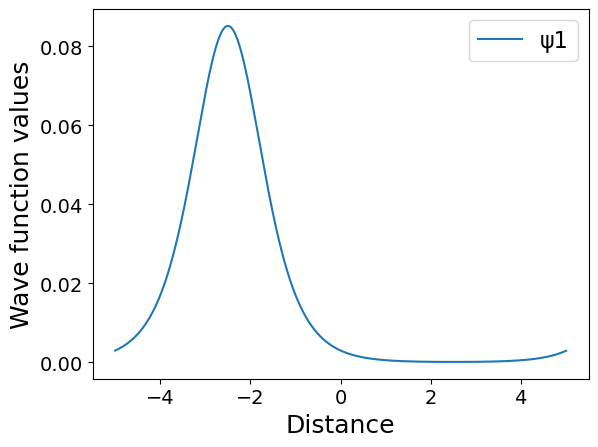

In [23]:
def potential_shift(x, x0):
    V =  V0*np.exp(-(x-x0)**2)
    return V

N = 1000
xmax = 5
xmin = -5.0
xvec = np.linspace(xmin, xmax, N)
pot_min = (xmax-xmin)/2
x0 = xmin+pot_min/2
V1 = potential_shift(xvec, x0)#calculating V0
mat_H1 = make_H1dp(N,xmax,xmin, V1) #Calculating the matrix for single potential system (V1)
energy1,mat_v1 = np.linalg.eig(mat_H1)#Diagonalization
ind1 = np.argsort(energy1)
energy1 = energy1[ind1]
mat_v1 = mat_v1.T[ind1]

ψ1 = -mat_v1[0]
plt.plot(xvec, -ψ1, label = "ψ1")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 16)
plt.show()

Then $\psi_2(x)$ is

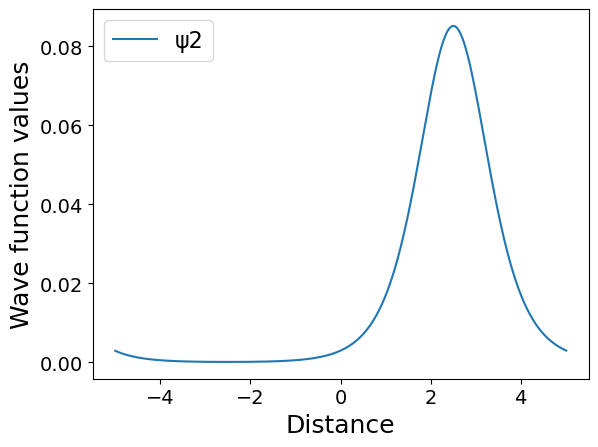

In [24]:
x0 = xmin+pot_min*3/2
V2 = potential_shift(xvec, x0)
mat_H2 = make_H1dp(N,xmax,xmin, V2)
energy2,mat_v2 = np.linalg.eig(mat_H2)
ind2 = np.argsort(energy2)
energy2 = energy2[ind2]
mat_v2 = mat_v2.T[ind2]

ψ2 = -mat_v2[0]
plt.plot(xvec, ψ2, label = "ψ2")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 16)
plt.show()

Now we can calculate the matrix elements. Note that we are using the same single potentials, 
$$
\int |\psi_1(x)|^2 V_2(x)dx = \int V_1(x)|\psi_2(x)|^2 dx
$$
$$
\int \psi_1(x)^{\ast} \psi_2(x) (V_1(x)+\epsilon_0)dx = \int \psi_2(x)^{\ast} \psi_1(x)( V_2(x)+\epsilon_0) dx
$$

In [25]:
def calc_Htb(energy,ψ1,ψ2, V1, dx):
    mat_Htb = np.zeros((2,2))
    t = 0.0
    v0 = 0.0
    N = len(ψ1)
    #Integraition
    for i in range(N):   
        t += (energy[0]+V1[i])*ψ1[i]*ψ2[i]*dx
        v0 += V1[i]*ψ2[i]*ψ2[i]*dx
    mat_Htb[0,0] = energy[0]+v0
    mat_Htb[0,1] = t
    mat_Htb[1,0] = t
    mat_Htb[1,1] = energy[0]+v0
    return mat_Htb

In [26]:
N = 1000
xmax = 5
xmin = -5.0
dx = (xmax-xmin)/N
mat_Htb = calc_Htb(energy1,ψ1,ψ2,V1, dx)

print(mat_Htb)

[[-3.13885977e+00  3.06437431e-04]
 [ 3.06437431e-04 -3.13885977e+00]]


Now we got the values of tthe matrix. By diagonalizing the matrix, we can get the eigenenergy and eigen vectors as follows:

[-3.13916621 -3.13855334]
[-0.70710678  0.70710678]


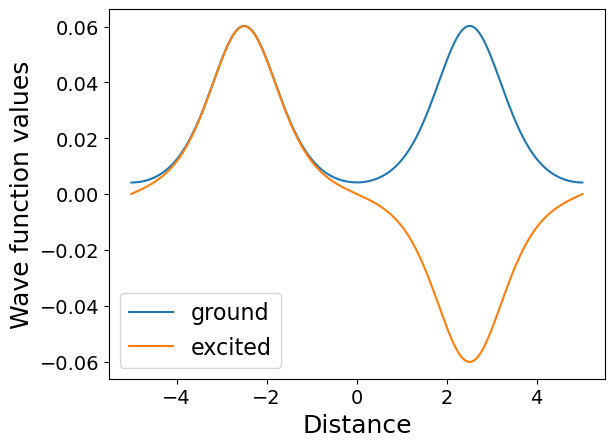

In [27]:
# Diagonalization
ε,c1 = np.linalg.eig(mat_Htb)
ind = np.argsort(ε)
ε = ε[ind]
c1 = c1.T[ind]
print(ε)
print(c1[0])
ψg = c1[0][0]*ψ1 + c1[0][1]*ψ2
ψf = c1[1][0]*ψ1 + c1[1][1]*ψ2
plt.plot(xvec, ψg, label = "ground")
plt.plot(xvec, -ψf, label = "excited")
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 16)
plt.show()

We reproduced the similar wave function and eigen energies. This method using the one potenteial wave function is called Tight binding model. 

In [30]:
#Memo
val = 2
ψ = c1[val][0]*ψ1 + c1[val][1]*ψ2
plt.plot(xvec, ψ)
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2